# Multiple Linear Regression

## Data Preprocessing

In [60]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[ : , 0:-1 ].values
y = dataset.iloc[ : , -1 ].values

# Encoding the categorical variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('Encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression Machine Learning Model on the Training Set

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set results

In [62]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis = 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Calculating the differences between predicted data & test data

In [63]:
y_frame = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis = 1)
y_frame = pd.DataFrame(y_frame)
y_frame = y_frame.rename(columns={0: 'y_pred', 1: 'y_test'})
y_frame['differences'] = y_frame['y_pred'] - y_frame['y_test']
pd.set_option("display.precision", 0)
print(y_frame)

   y_pred  y_test  differences
0  103015  103282         -267
1  132582  144259       -11677
2  132448  146122       -13674
3   71976   77799        -5823
4  178537  191050       -12513
5  116161  105008        11153
6   67852   81229       -13377
7   98792   97484         1308
8  113969  110352         3617
9  167921  166188         1733


## Statistical significance of the model

In [64]:
import statsmodels.api as sm
new_X = sm.add_constant(X)
updated_X = np.array(new_X, dtype = float)
regressor_OLS = sm.OLS(y, updated_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        10:32:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x1          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x2          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x3          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
x4             0.8060      0.046     17.369      0.000       0.712       0.900
x5            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x6             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.81e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Removing the redundant dummy variable

In [65]:
new_X = updated_X[ : , [0, 2, 3, 4, 5, 6] ]
opt_X = new_X[ : , [0, 1, 2, 3, 4, 5] ]

## Training the regression model after the removal of a dummy variable

In [66]:
opt_X = new_X[ : , [0, 1, 2, 3, 4, 5] ]
regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        10:32:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Building the optimal model using backward elimination

In [67]:
opt_X = new_X[ : , [0, 1, 3, 4, 5] ]
regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           8.49e-29
Time:                        10:32:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
opt_X = new_X[ : , [0, 3, 4, 5] ]
regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        10:32:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
opt_X = new_X[ : , [0, 3, 5] ]
regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.16e-31
Time:                        10:32:20   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

## The final regression equation

Profit = 4,698 + 0.7966 × R & D Spend + 0.0299 × Marketing Spend

## Checking the assumptions

In [70]:
import seaborn as sns

In [72]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50,50,50,50
mean,73722,121345,211025,112013
std,45902,28018,122290,40306
min,0,51283,0,14681
25%,39936,103731,129300,90139
50%,73051,122700,212716,107978
75%,101603,144842,299469,139766
max,165349,182646,471784,192262


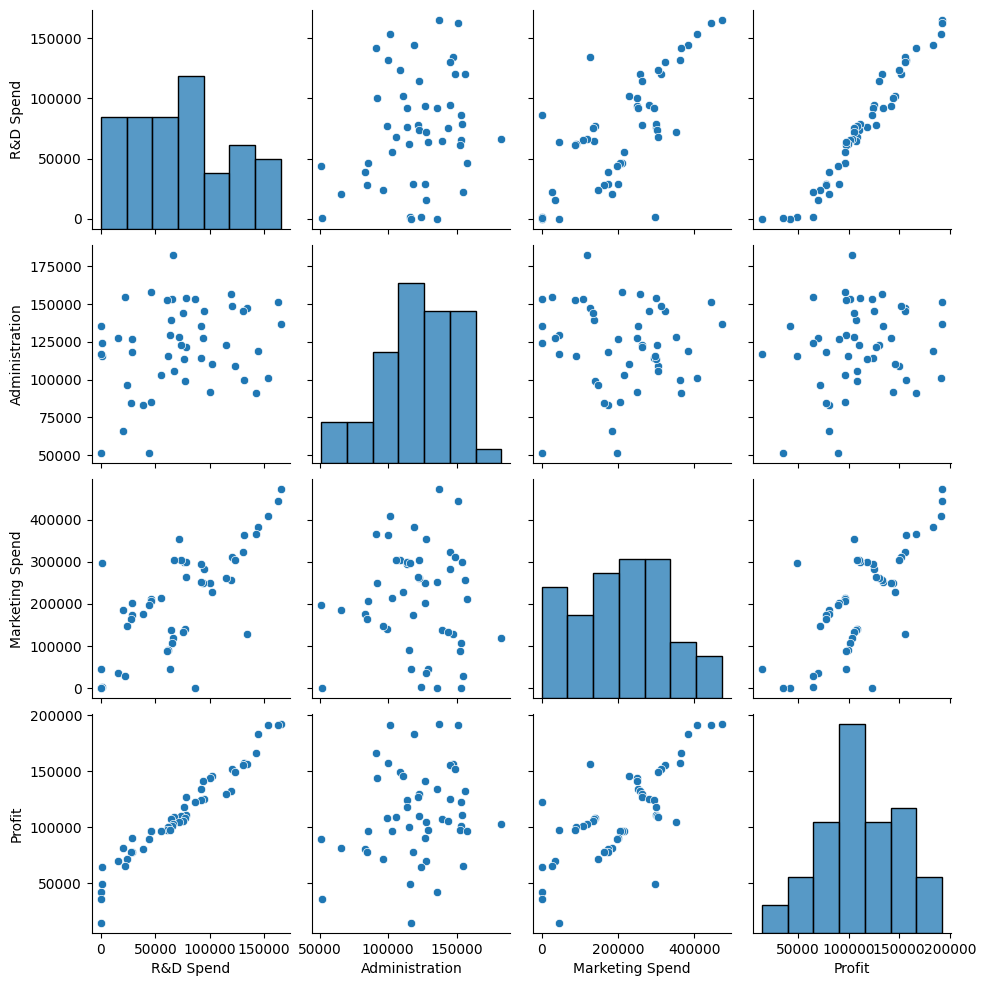

In [73]:
p = sns.pairplot(dataset)

### Linearity

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


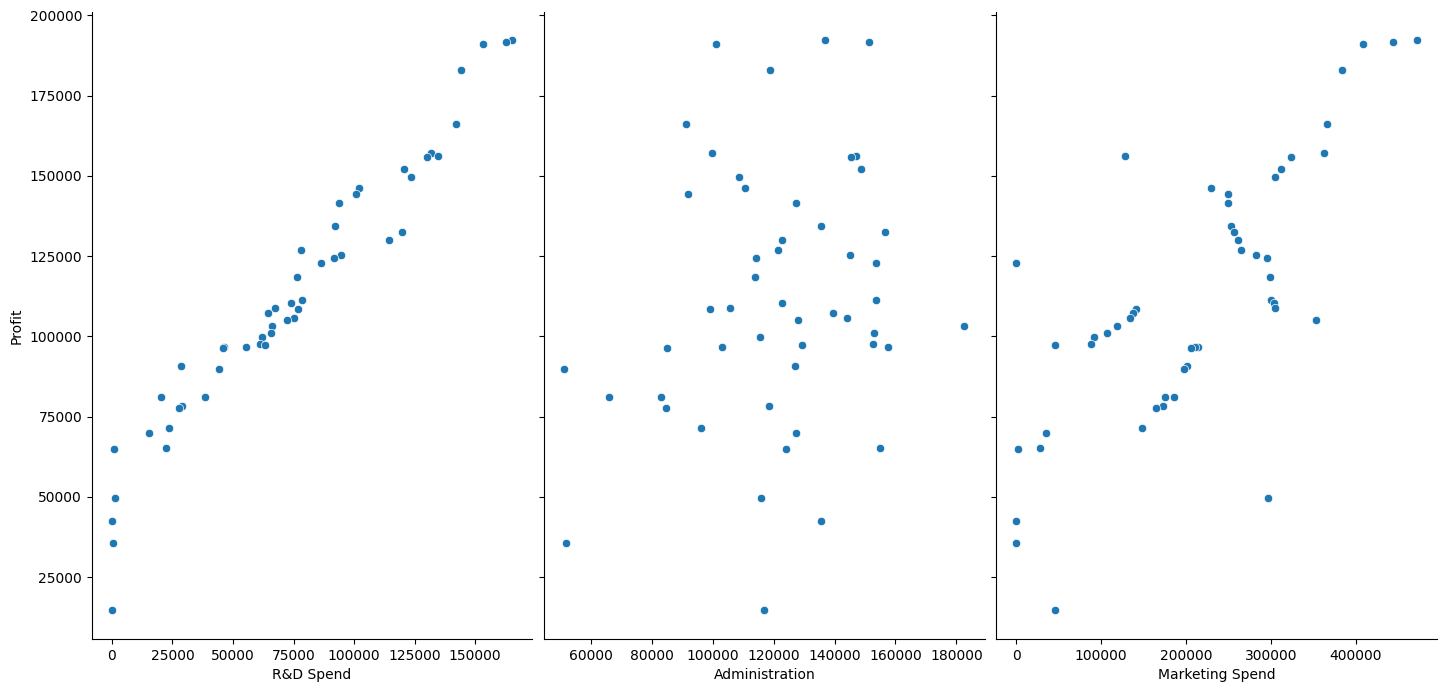

In [74]:
p = sns.pairplot(dataset, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit', size=7, aspect=0.7)

### Check for Homoscedasticity

In [75]:
regressor_homo = LinearRegression()
regressor_homo.fit(X, y)

LinearRegression()

In [76]:
y_pred_homo = regressor.predict(X)

In [77]:
residuals = y - y_pred_homo

(-20000.0, 15000.0)

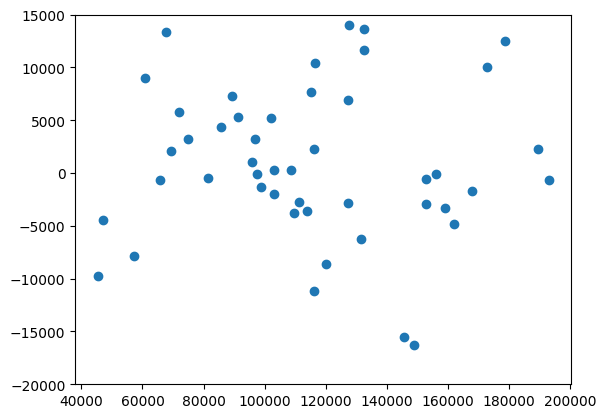

In [78]:
plt.scatter(y_pred_homo, residuals)
plt.ylim(-20000,15000)

### Check for Normality of error terms/residuals

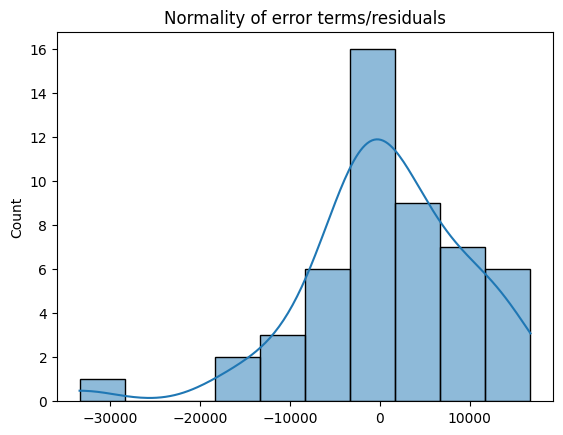

In [79]:
p = sns.histplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

### Checking for Multicollinearity

<ipython-input-80-53a19ddbe438>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', square=True)


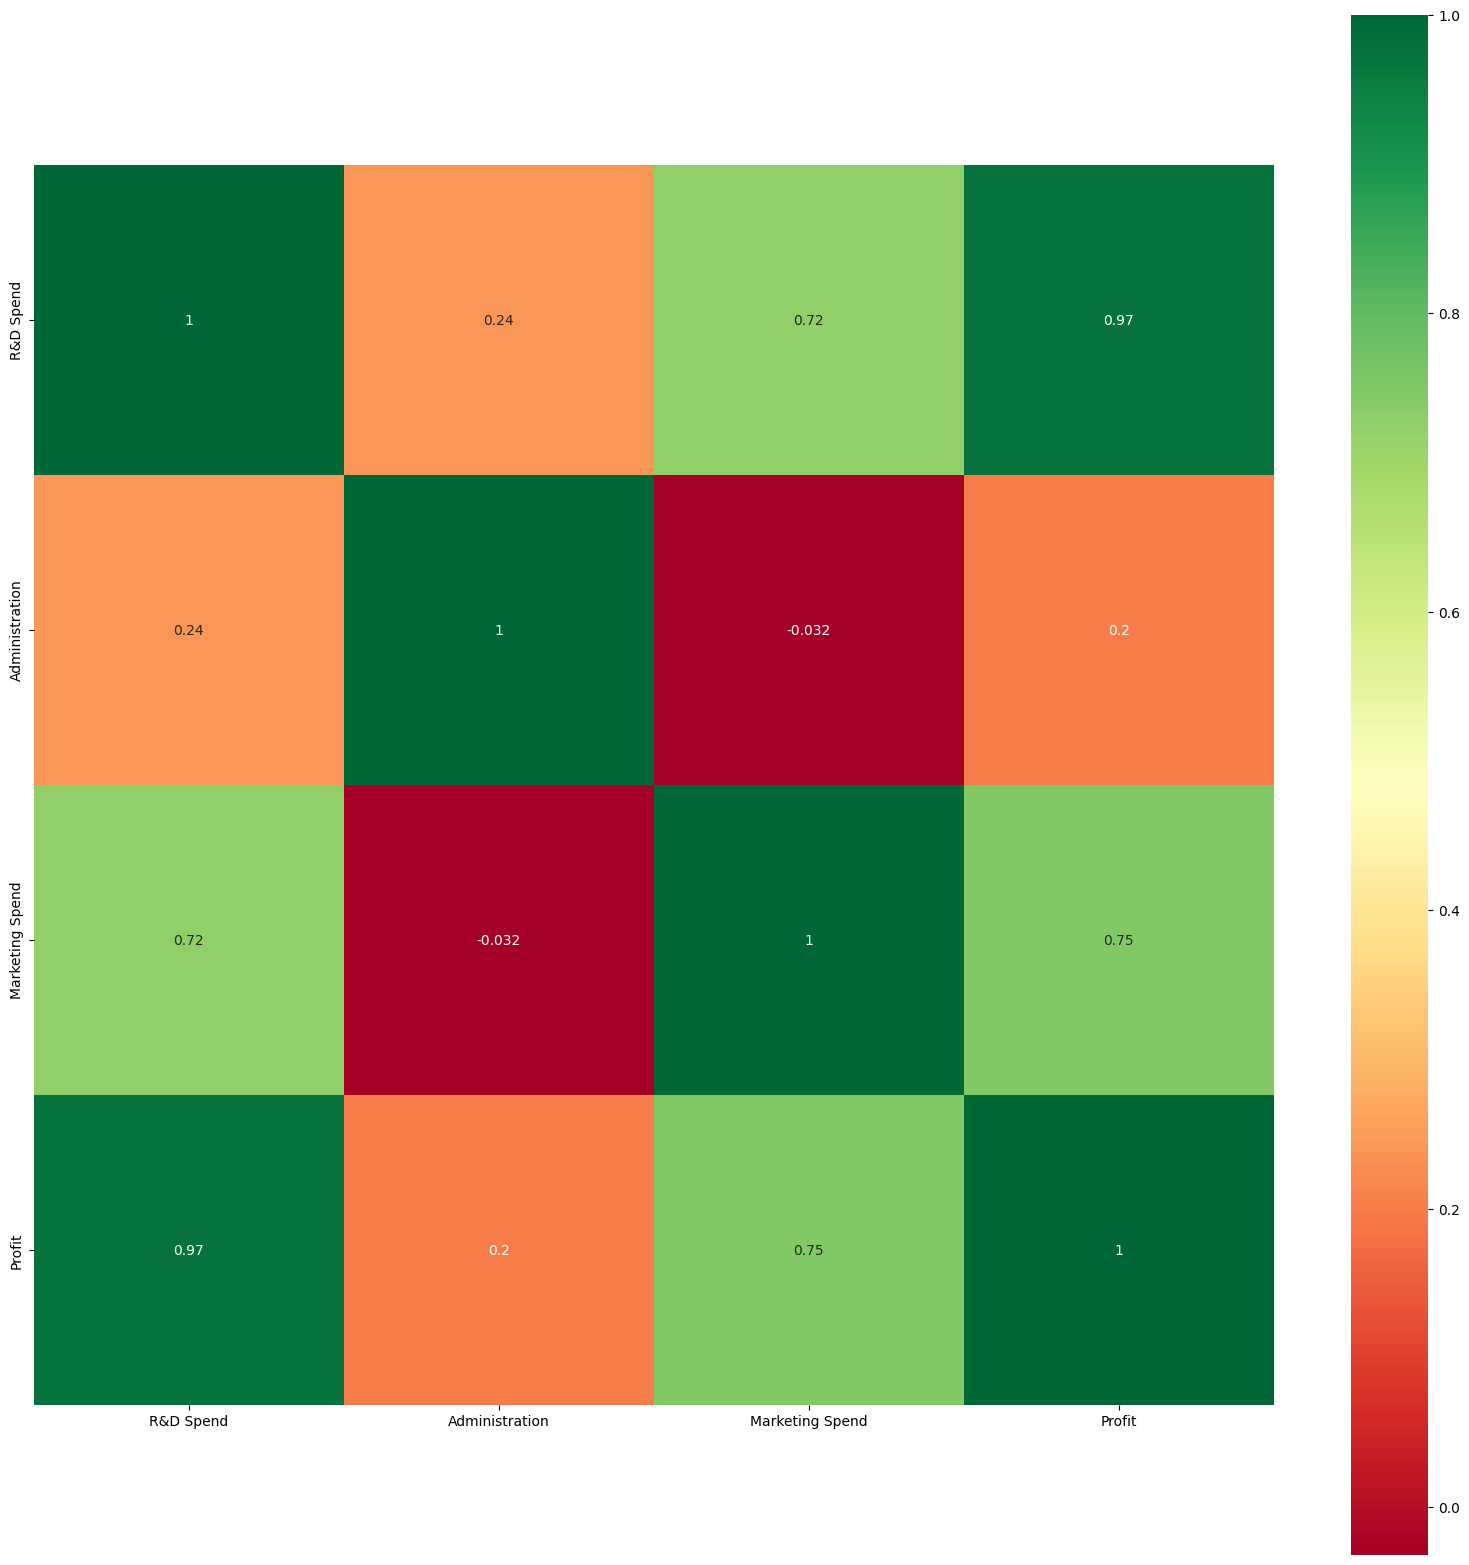

In [80]:
plt.figure(figsize=(20,20))
p = sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', square=True)